In [6]:
import pandas as pd
import numpy as np
import os

print("Libraries imported.")

Libraries imported.


In [7]:
# --- Load the Column Names ---

# First, we tell Python where the main data folder is.
# '..' means "go up one folder" (from 'notebooks' to 'soldier-activity-project')
DATA_PATH = "../data/UCI HAR Dataset/"

print(f"Path to data is: {DATA_PATH}")

# Now, load the 'features.txt' file using pandas
# sep=' ' means the columns in the file are separated by a space
features_df = pd.read_csv(
    DATA_PATH + "features.txt", 
    sep=' ', 
    header=None, 
    names=['FeatureID', 'FeatureName']
)

# We only care about the second column (FeatureName)
# Let's get it as a Python list
feature_names = features_df['FeatureName'].values.tolist()

print(f"\nSuccessfully loaded {len(feature_names)} feature names.")
print("Here are the first 5:")
print(feature_names[:5])

Path to data is: ../data/UCI HAR Dataset/

Successfully loaded 561 feature names.
Here are the first 5:
['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y']


In [8]:
# --- Load the Training Data ---

# Tell pandas to load the big X_train.txt file
# delim_whitespace=True means the numbers are separated by spaces
print("Loading X_train.txt (the sensor data)...")
X_train = pd.read_csv(
    DATA_PATH + "train/X_train.txt", 
    delim_whitespace=True, 
    header=None
)

# Set all 561 column names using the list we just made
X_train.columns = feature_names

# --- Load the Training "Answers" ---

# Now load the y_train.txt file (the labels)
print("Loading y_train.txt (the answers)...")
y_train = pd.read_csv(
    DATA_PATH + "train/y_train.txt", 
    header=None, 
    names=['Activity']
)

# --- Check Our Work ---
print("\nLoading complete!")
print(f"Training data (X_train) has {X_train.shape[0]} rows and {X_train.shape[1]} columns.")
print(f"Training labels (y_train) has {y_train.shape[0]} rows.")

# Display the first 5 rows of the main data table
print("\nHere's a preview of the main data (X_train):")
X_train.head()

Loading X_train.txt (the sensor data)...


C:\Users\Sripaad\AppData\Local\Temp\ipykernel_16120\871321789.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv(


Loading y_train.txt (the answers)...

Loading complete!
Training data (X_train) has 7352 rows and 561 columns.
Training labels (y_train) has 7352 rows.

Here's a preview of the main data (X_train):


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [10]:
# --- Load the Test Data ---

print("Loading X_test.txt (the sensor data)...")
X_test = pd.read_csv(
    DATA_PATH + "test/X_test.txt", 
    sep='\s+',  # Using sep='\s+' as the warning suggested
    header=None
)
X_test.columns = feature_names # Use the same column names

# --- Load the Test "Answers" ---

print("Loading y_test.txt (the answers)...")
y_test = pd.read_csv(
    DATA_PATH + "test/y_test.txt", 
    header=None, 
    names=['Activity']
)

# --- Check Our Work ---
print("\nLoading complete!")
print(f"Test data (X_test) has {X_test.shape[0]} rows and {X_test.shape[1]} columns.")
print(f"Test labels (y_test) has {y_test.shape[0]} rows.")

# Display the first 5 rows of the test data
print("\nHere's a preview of the main data (X_test):")
X_test.head()

Loading X_test.txt (the sensor data)...
Loading y_test.txt (the answers)...

Loading complete!
Test data (X_test) has 2947 rows and 561 columns.
Test labels (y_test) has 2947 rows.

Here's a preview of the main data (X_test):


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857


In [11]:
# --- Load the Activity Names ---

print("Loading activity_labels.txt...")
activity_labels = pd.read_csv(
    DATA_PATH + "activity_labels.txt", 
    sep=' ', 
    header=None, 
    names=['ActivityID', 'ActivityName']
)

# --- Check Our Work ---
print("\nSuccess! Here is the 'key' for our activities:")
print(activity_labels.to_string(index=False))

Loading activity_labels.txt...

Success! Here is the 'key' for our activities:
 ActivityID       ActivityName
          1            WALKING
          2   WALKING_UPSTAIRS
          3 WALKING_DOWNSTAIRS
          4            SITTING
          5           STANDING
          6             LAYING


In [12]:
# --- Combine Training Data ---

# pd.concat([...], axis=1) "glues" the tables together side-by-side
# We'll save this as a new table called 'train_df'
train_df = pd.concat([X_train, y_train], axis=1)

# Display the first 5 rows
# You'll have to scroll to the far right to see the new 'Activity' column
print("Combined training data (first 5 rows):")
train_df.head()

Combined training data (first 5 rows):


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,5
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,5
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,5
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,5
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,5


In [13]:
# --- Make Labels Readable ---

# First, create a "lookup map" from our activity_labels table
# It will look like: {1: 'WALKING', 2: 'WALKING_UPSTAIRS', ...}
activity_map = dict(zip(activity_labels['ActivityID'], activity_labels['ActivityName']))

print(f"Our lookup map: {activity_map}")

# Now, use .map() to "find and replace" all numbers in the 'Activity' column
train_df['Activity'] = train_df['Activity'].map(activity_map)

# --- Check Our Work ---
print("\nData with readable labels (first 5 rows):")
train_df.head()

Our lookup map: {1: 'WALKING', 2: 'WALKING_UPSTAIRS', 3: 'WALKING_DOWNSTAIRS', 4: 'SITTING', 5: 'STANDING', 6: 'LAYING'}

Data with readable labels (first 5 rows):


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,STANDING


In [14]:
# --- Check Activity Balance ---

# This counts how many times each unique name appears in the 'Activity' column
activity_counts = train_df['Activity'].value_counts()

print("Count of samples for each activity:")
print(activity_counts)

Count of samples for each activity:
Activity
LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: count, dtype: int64


In [16]:
# --- Import Plotting Libraries ---

import matplotlib.pyplot as plt
import seaborn as sns

# This magic command tells Jupyter to show plots inside the notebook
%matplotlib inline

print("Plotting libraries imported.")

Plotting libraries imported.


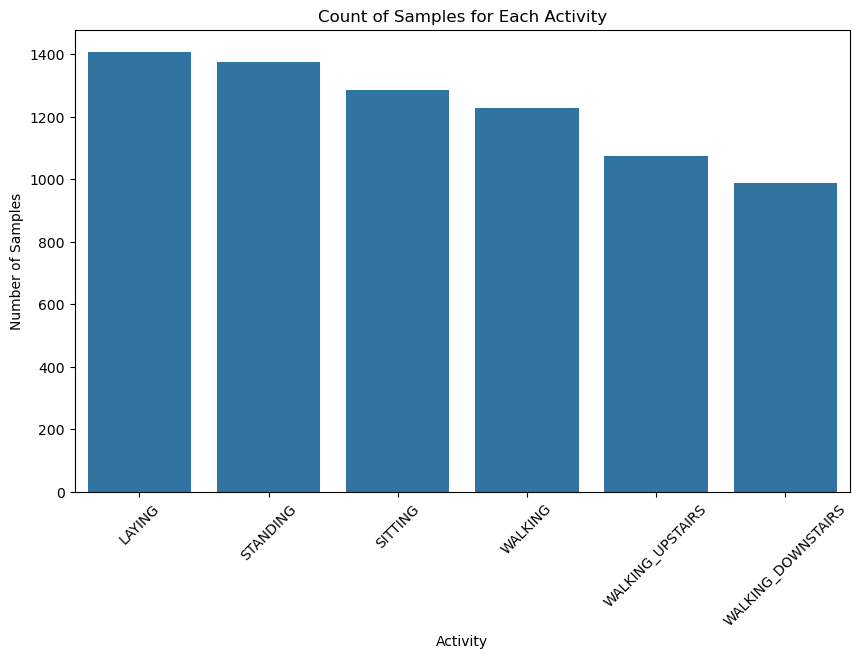

In [17]:
# --- Plot the Activity Counts ---

# Set a good size for the plot
plt.figure(figsize=(10, 6))

# Use Seaborn's 'countplot' to automatically count and plot the 'Activity' column
sns.countplot(
    x='Activity', 
    data=train_df, 
    order=train_df['Activity'].value_counts().index  # Order bars from most to least
)

# Add a title
plt.title('Count of Samples for Each Activity')
plt.ylabel('Number of Samples')
plt.xlabel('Activity')

# Rotate the x-axis labels so they don't overlap
plt.xticks(rotation=45)

# Show the plot
plt.show()

Plotting 'tBodyAccMag-mean()' for each activity...


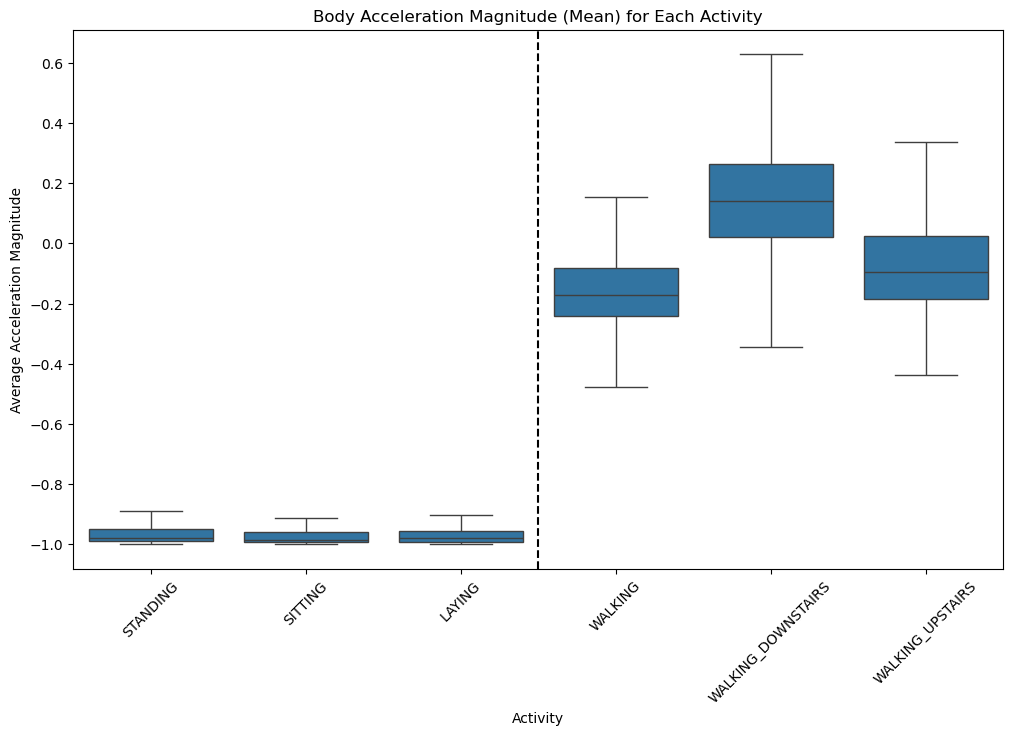

In [18]:
# --- Explore a Feature: Static vs. Dynamic ---

print("Plotting 'tBodyAccMag-mean()' for each activity...")

# Set a good size for the plot
plt.figure(figsize=(12, 7))

# Create a boxplot
# A boxplot shows the range and average (median) of values
sns.boxplot(
    x='Activity', 
    y='tBodyAccMag-mean()',  # This is one of our 561 feature columns
    data=train_df,
    showfliers=False # Hides the 'outlier' dots to make it cleaner
)

# Add titles and labels
plt.title('Body Acceleration Magnitude (Mean) for Each Activity')
plt.ylabel('Average Acceleration Magnitude')
plt.xlabel('Activity')

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Separate the static and dynamic activities with a vertical line
plt.axvline(x=2.5, color='black', linestyle='--')

# Show the plot
plt.show()

In [19]:
# --- Import t-SNE ---
from sklearn.manifold import TSNE

print("Imported TSNE.")

# --- Take a sample of the data ---
# We'll take 1000 random rows to speed things up
sample_df = train_df.sample(n=2000, random_state=42)

# Get the features (X) and labels (y) from our sample
X_sample = sample_df.drop('Activity', axis=1)
y_sample = sample_df['Activity']

print(f"Running t-SNE on {len(X_sample)} samples...")

# --- Run t-SNE ---
# This will squish our 561 features down to 2
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(X_sample)

print("t-SNE complete!")

# --- Add the results to a new DataFrame for plotting ---
tsne_df = pd.DataFrame(data=tsne_results, columns=['tsne-X', 'tsne-Y'])
tsne_df['Activity'] = y_sample.values # Add the activity names

tsne_df.head()

Imported TSNE.
Running t-SNE on 2000 samples...
t-SNE complete!


,tsne-X,tsne-Y,Activity
0,35.019070,18.764030,WALKING_DOWNSTAIRS
1,41.870213,8.115708,WALKING_DOWNSTAIRS
2,40.255577,-18.858278,WALKING
3,-29.373770,0.443877,SITTING
4,33.090538,13.976361,WALKING_DOWNSTAIRS


Plotting t-SNE results...


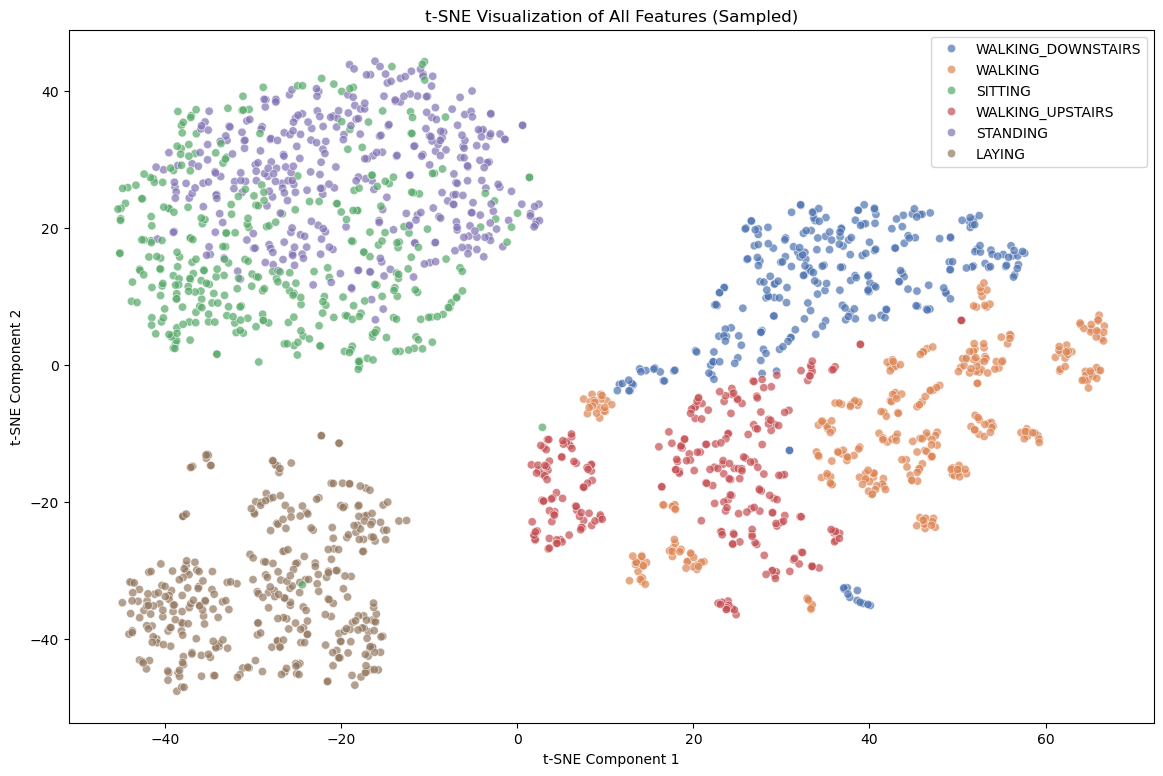

In [20]:
# --- Plot the t-SNE Clusters ---

print("Plotting t-SNE results...")

plt.figure(figsize=(14, 9))

# Create a scatter plot, coloring each dot by its 'Activity'
sns.scatterplot(
    x="tsne-X", 
    y="tsne-Y",
    hue="Activity",  # This is the magic part!
    data=tsne_df,
    palette="deep",  # Use a nice color scheme
    alpha=0.7        # Make dots slightly transparent
)

plt.title('t-SNE Visualization of All Features (Sampled)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(loc='best') # Put the legend in a good spot

plt.show()

In [21]:
# --- 7. Model Training ---

# Import the model we want to use (Random Forest)
from sklearn.ensemble import RandomForestClassifier

# Import the tools to measure how good our model is
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("ML libraries imported. Ready to train!")

ML libraries imported. Ready to train!


In [22]:
# --- 8. Train the Model ---

print("Initializing the Random Forest Classifier...")
# Create an instance of the model
# n_estimators=100 means it will build 100 decision trees
# random_state=42 ensures we get the same result every time we run it
model = RandomForestClassifier(n_estimators=100, random_state=42)

print("Training the model... (This may take 10-20 seconds)")

# 'model.fit()' is the command that starts the training
# We give it the "questions" (X_train) and the "answers" (y_train)
model.fit(X_train, y_train.values.ravel())

print("Training complete!")

Initializing the Random Forest Classifier...
Training the model... (This may take 10-20 seconds)
Training complete!


In [23]:
# --- 9. Evaluate the Model ---

print("Evaluating the model on the test data...")

# Use model.predict() to get the model's "guesses" for the X_test data
y_pred = model.predict(X_test)

# --- Check the Accuracy ---
# Compare the model's guesses (y_pred) to the real answers (y_test)
accuracy = accuracy_score(y_test, y_pred)

print("\n--- Accuracy ---")
print(f"The model is {accuracy * 100:.2f}% accurate!")

# --- Detailed Report ---
# The classification report gives a more detailed breakdown
# It shows 'precision' and 'recall' for each activity
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred, target_names=activity_labels['ActivityName']))

Evaluating the model on the test data...

--- Accuracy ---
The model is 92.57% accurate!

--- Classification Report ---
                    precision    recall  f1-score   support

           WALKING       0.89      0.97      0.93       496
  WALKING_UPSTAIRS       0.88      0.89      0.89       471
WALKING_DOWNSTAIRS       0.97      0.86      0.91       420
           SITTING       0.91      0.90      0.90       491
          STANDING       0.91      0.92      0.91       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.93      2947
         macro avg       0.93      0.92      0.92      2947
      weighted avg       0.93      0.93      0.93      2947



Calculating Confusion Matrix...
Plotting heatmap...


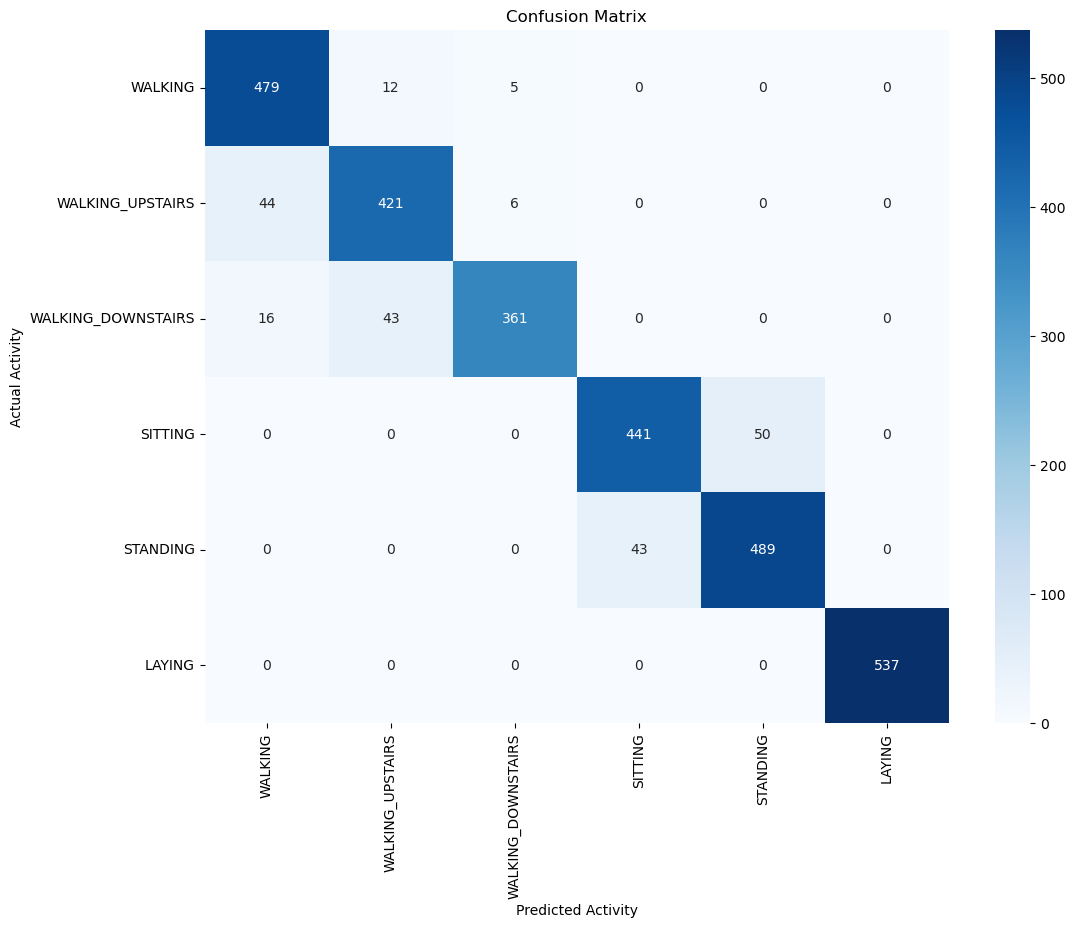

In [24]:
# --- 10. Create a Confusion Matrix ---

print("Calculating Confusion Matrix...")

# Get the matrix (it's just a table of numbers)
cm = confusion_matrix(y_test, y_pred)

# Let's get the actual activity names for the labels
activity_names = activity_labels['ActivityName']

# --- Plot the Matrix as a Heatmap ---
# A heatmap makes the numbers easy to read with colors
print("Plotting heatmap...")

plt.figure(figsize=(12, 9))

# Use Seaborn's heatmap function to plot it
sns.heatmap(
    cm, 
    annot=True,  # Show the numbers in each square
    fmt='d',     # Format the numbers as integers
    cmap='Blues',  # Use a blue color scheme
    xticklabels=activity_names, 
    yticklabels=activity_names
)

# Add titles and labels
plt.title('Confusion Matrix')
plt.ylabel('Actual Activity')
plt.xlabel('Predicted Activity')

plt.show()

In [25]:
# --- 11. Save the Model to a File ---
import joblib

# Define the path to save the model
# We go "up" one level (../) and then into the 'models' folder
model_filename = '../models/har_random_forest.joblib'

print(f"Saving model to {model_filename} ...")

# Use joblib.dump to save the 'model' variable to the file
joblib.dump(model, model_filename)

print("Model saved successfully!")

Saving model to ../models/har_random_forest.joblib ...
Model saved successfully!
